In [72]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Cargamos dataset original

In [73]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


## Carácteristicas train original

In [74]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
917912,weH90F5clY6yUp5XwJ0C2A,fcX6hy0JaXewdgnzYA15Pg,mG-JcnRZCAYfznkxhiClkA,5.0,0,0,0,What a gem. My friend and I loved everything a...,2018-01-07 04:04:00
314493,v200ghzzmgqhWl9aIn1V8w,nQpgkgFfZSPZNtvA1jjRZg,VLgeZnsCS20OD5hyLvhjsw,4.0,1,0,0,"The short ribs are excellent, super tasty and ...",2021-07-12 23:55:19
535164,w7H42uwkYc8Rk82n-eSaog,N61NZ9hdhezJ5LxDdiHmBQ,eoH4nxBTSu6kf-41pWDwJQ,2.0,2,1,0,I came in during the very slow afternoon weekd...,2013-05-13 21:49:31
399546,tBNndnCgtLGIZCmUuANWkQ,kKMfOvgAvE41U4-HpMjt0A,pp7n4Oiexz69Beg7Xl8Tjw,5.0,0,0,0,Lemon Risotto was very tasty with crunchy vegg...,2018-03-17 19:29:51
496110,At7iQlZ9fGKU-FKgMvFUFw,aICLRkgkPEES96fGWuEA-w,dJ4jKcCq6tWTFIfIOjBtzw,5.0,0,0,0,Omg my latest obsession. Just discovered this...,2021-10-23 21:38:50


In [75]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [76]:
train_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

## Carácteristicas test original

In [77]:
test_reviews.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date
128604,fWqXx-GtWKtfAtlosQjEgQ,d7uWrNKUAgywq3Tus6Hc5w,J2gkKCIOhmMTDIt0CKkXAg,0,1,1,I love the car washes here! This is the gas st...,2021-01-23 22:29:30
7138,BjazT-M-HGzTNIReg9hB-w,WspwIQyKn6icthQ83scA2g,AHjwEsmD0zeK6ie-QtjXAA,2,1,1,I cannot even begin to explain the flavor and ...,2019-12-17 20:36:06
311456,jbtmS7BoiujIy9NH58L8NA,Zgd8BPMuBb8310UwyybmBw,ytynqOUb3hjKeJfRj5Tshw,1,0,0,The food mecca of Philly. While not condusive ...,2014-12-03 01:53:53
401204,ITUtimau5J2bFIIjxBSoEg,CLS0JS4_7tW6M-00iHN_vA,fQknpOKcW_JtfE6oIoGkKg,0,0,0,Delicious large salmon Poke Bowl! The salmon w...,2020-02-01 03:56:14
344382,dbSbNufy_xCI1v4EJ9QJwA,VChksm4EoWoGYgNGHG_DzQ,7jPySMocq3QkmTalOCJ5mg,1,0,0,In town so I wanted to try the best of the bes...,2018-01-22 20:53:44


In [78]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [79]:
test_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date'],
      dtype='object')

# Exploración usuario

In [80]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
74156,84oYuXLFKMHaszev8BXwxg,Chris,23,2013-11-16 21:57:20,10,3,5,NaN,"WwulXySQN8t2hwqH_yWurA, Ou3cuozha57s2kgv9MtKRg...",0,4.00,0,0,0,0,0,0,0,0,0,0,0
558280,3YhLRLNyehQLDEYlp8daTA,Eric,7,2010-05-21 16:26:46,12,1,0,NaN,NaN,0,4.50,0,0,0,0,0,0,0,0,0,0,0
218660,ySEgpgc7UlcwnQEbph4F7w,Tamara,7,2012-10-20 19:57:03,2,0,0,NaN,NaN,0,3.86,0,0,0,0,0,0,0,0,0,0,0
322030,gKJ4n66AmDzy4YzaQNnm_A,Chris,7,2011-07-07 12:58:46,7,0,0,NaN,"VUkJx-q6bvL5Vb9k0V_yKA, iSAoGdRPfKUVq_IZx_eKGA...",0,4.43,0,0,0,0,0,0,0,0,0,0,0
645469,D4NQOf8UnssDuU8c3tjqWg,A,34,2012-12-22 00:14:57,17,2,10,NaN,NaN,0,4.21,0,0,0,0,0,0,0,0,0,0,2


In [81]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [82]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [83]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

## Drop columnas

In [84]:
new_usuarios = usuarios.drop(columns=["elite", "friends", "name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

## Procesamiento `compliment_`

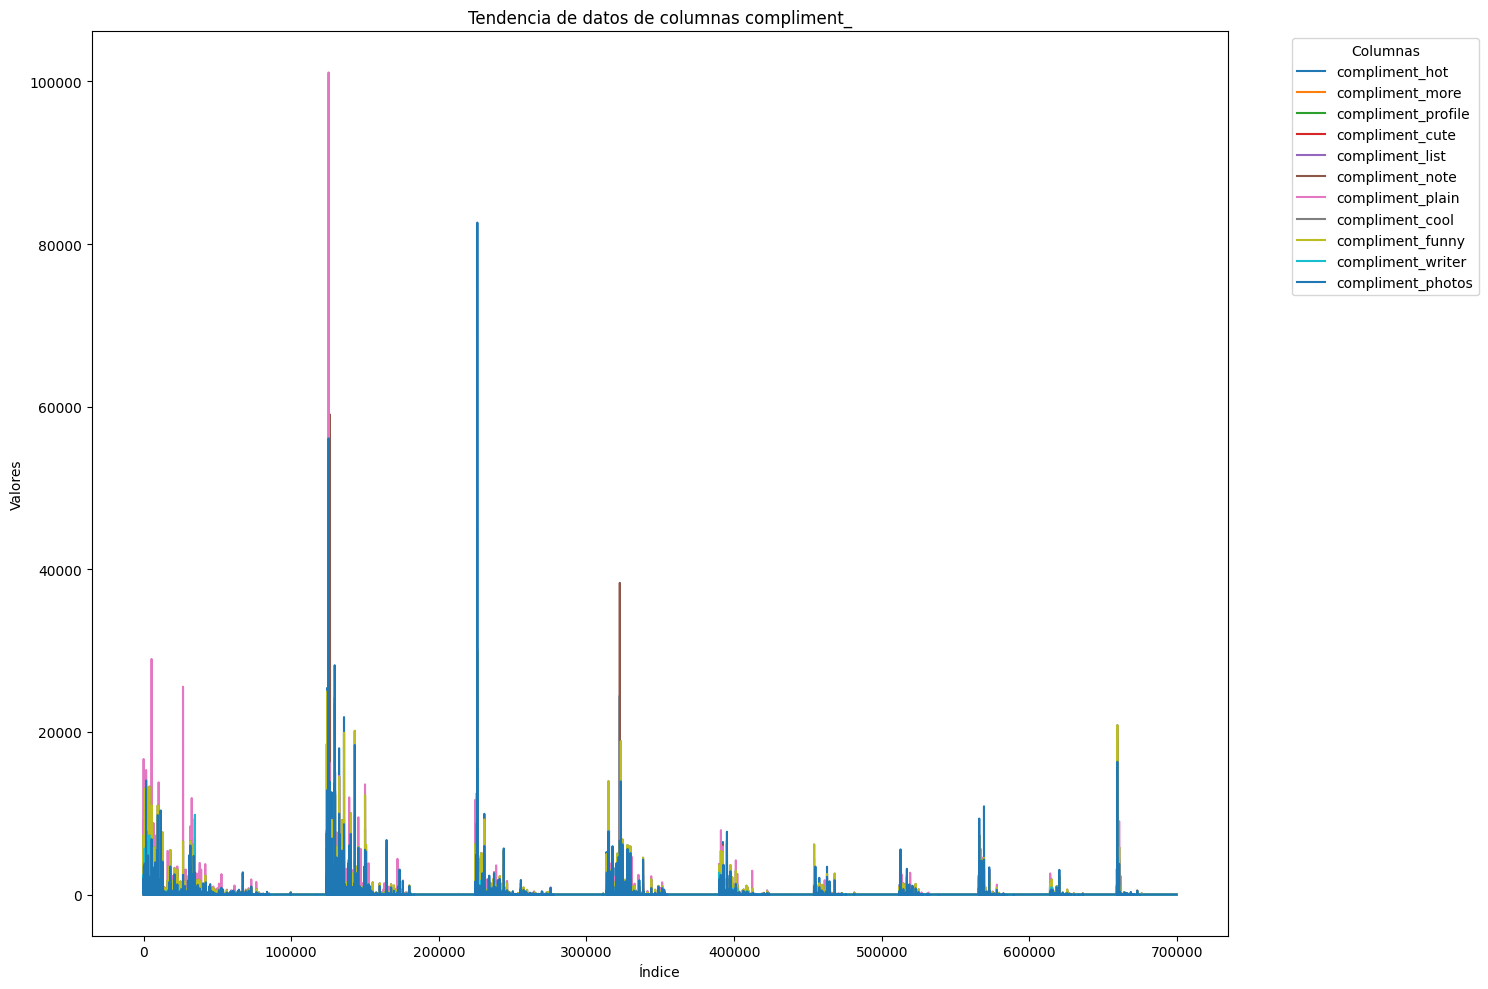

In [85]:
# Filtrar las columnas que comienzan con 'compliment_'
compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

# Crear un DataFrame con solo esas columnas
compliment_data = new_usuarios[compliment_cols]

# Crear un gráfico de distribución para cada columna
compliment_data.plot(kind='line', figsize=(15, 10), title='Tendencia de datos de columnas compliment_')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
# Sumar todas las columnas que empiezan con 'compliment_'
new_usuarios['compliment'] = new_usuarios[compliment_cols].sum(axis=1)

# Eliminar las columnas originales si ya no son necesarias
new_usuarios = new_usuarios.drop(columns=compliment_cols)

# Verificar el resultado
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
374199,TDVv8uxxgfhxF9Ix9eSPoQ,9,2016-07-07 18:33:07,1,0,1,0,4.33,0
229228,_MEOQwJVnhznl1zhKKhy6A,24,2010-06-21 20:44:59,48,3,8,3,4.28,3
468494,n4H4Rh7iaqhzdQKpDnQgPQ,16,2011-06-11 19:40:22,13,4,3,0,3.94,0
22359,9P4KaQMIq66J46pBj-yfcw,9,2013-02-19 21:15:36,17,3,5,0,3.90,0
128866,O4DIgOOUNTyzSsTPqwgsNA,9,2011-03-07 02:31:31,1,0,0,0,5.00,0


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_usuarios["compliment"] = scaler.fit_transform(new_usuarios["compliment"].values.reshape(-1, 1))

new_usuarios["compliment"].describe()

count    6.996190e+05
mean     6.093683e-18
std      1.000001e+00
min     -3.508534e-02
25%     -3.508534e-02
50%     -3.508534e-02
75%     -3.266433e-02
max      3.925654e+02
Name: compliment, dtype: float64

## Procesamiento columnas de enteros

In [88]:
from sklearn.preprocessing import StandardScaler

compliment_cols = ["review_count", "useful", "funny", "cool", "fans"]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,review_count,useful,funny,cool,fans
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-1.592482e-17,-5.281192e-19,3.412462e-18,-1.425922e-17,3.412462e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.047548e-01,-7.761433e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
25%,-2.801503e-01,-7.661663e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
50%,-2.309414e-01,-7.262584e-02,-4.996237e-02,-5.212889e-02,-9.224837e-02
75%,-9.151607e-02,-5.566497e-02,-4.517766e-02,-4.759982e-02,-5.714961e-02
max,1.429998e+02,2.057435e+02,2.963183e+02,2.262622e+02,4.385369e+02


## Procesamiento fecha

In [89]:
new_usuarios['yelping_since'] = pd.to_datetime(usuarios['yelping_since'], errors='coerce')

new_usuarios['yelping_since'] = new_usuarios['yelping_since'].dt.year

new_usuarios['yelping_since'].value_counts()

yelping_since
2015    86327
2014    84032
2013    77842
2012    74207
2016    72077
2011    67727
2017    48702
2010    43511
2018    41295
2019    30608
2009    26512
2020    13342
2008    13234
2021    10252
2007     6502
2006     2407
2022      586
2005      424
2004       32
Name: count, dtype: int64

In [90]:
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
74454,-WymjI-kIsvC3rq5WPwn_Q,-0.017703,2015,-0.071628,-0.048367,-0.049864,-0.092248,4.43,-0.035085
424241,f9xbCvG2AjYe2laiHrqRDg,-0.288352,2014,-0.077614,-0.051557,-0.053261,-0.092248,2.00,-0.035085
306873,-OEWEH1WgWA3Nh-_6E3HMg,-0.181732,2015,-0.070630,-0.048367,-0.050997,-0.092248,1.44,-0.033875
640653,388Wj9nUwVBAp_4SsSvdXQ,-0.288352,2019,-0.077614,-0.051557,-0.053261,-0.092248,3.67,-0.035085
76421,yE9HytvnhUylfPGtHwNKWg,0.958274,2014,0.159838,0.015429,0.096198,0.153443,3.95,0.070229


## Últimos pasos

In [91]:
new_usuarios = new_usuarios.drop(columns=["yelping_since", "useful", "funny", "cool", "fans"])
new_usuarios.sample(5)

,user_id,review_count,average_stars,compliment
630268,RUQ8eJcxhNdwJDZGPtjNZQ,-0.288352,3.00,-0.035085
424693,mFH-dxPU72E18faVqmyeGA,-0.280150,3.67,-0.035085
235489,sRtnFkG3jtedXZsPEMe4qw,-0.230941,4.20,-0.035085
401083,Z0fN_NumMldnLAKQQqF-xQ,-0.288352,2.00,-0.035085
675310,wMhtSLHn1S0588nr_Dy--A,-0.263747,4.20,-0.035085


In [92]:
new_usuarios.isnull().sum()

user_id          0
review_count     0
average_stars    0
compliment       0
dtype: int64

# Exploración negocio

In [93]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
24245,7S6CfTTNIkC-gs-ttUn3ig,Gone To the Dogs Boutique,310 Corey Ave,St. Pete Beach,FL,33706,27.742509,-82.748794,4.0,17,1,NaN,"Pet Services, Pets, Pet Groomers, Pet Stores","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
2405,LsvXJPcFLYMNX0FvjJgUzQ,Healthy Garden & Gourmet Pizza,747 Haddon Ave,Collingswood,NJ,08108,39.915977,-75.067434,4.0,34,1,"{'OutdoorSeating': 'False', 'WiFi': ""u'free'"",...","Restaurants, Cafes","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
24160,CMSuSmZ6Z7yDFTzOaoFLUQ,Smoke & Ale,15551 Old Hickory Blvd,Nashville,TN,37211,36.039501,-86.742226,4.5,15,1,"{'RestaurantsPriceRange2': '2', 'BestNights': ...","Tobacco Shops, Vape Shops, Food, Lounges, Beer...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-19:0', ..."
2865,8lao3fRZqAKJQNKqR3xbpw,Some Other Place Bar & Grill,2280 S Old Hwy 141,Fenton,MO,63026,38.472284,-90.428284,3.5,12,0,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","American (Traditional), Breakfast & Brunch, Re...","{'Monday': '6:0-1:30', 'Tuesday': '6:0-1:30', ..."
20080,p6ZnCgofyFZRONWQT7k8oQ,Goodcents Deli Fresh Subs,1044 Town And Country Crossing Dr,Town and Country,MO,63017,38.621374,-90.519331,3.0,20,1,"{'HasTV': 'True', 'Alcohol': ""u'none'"", 'Resta...","Restaurants, Sandwiches, Delis","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."


In [94]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [95]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [96]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

## Drop columnas

In [97]:
new_negocios = negocios.drop(columns=["hours", "name", "postal_code", "address", "latitude", "longitude"]) # ?
new_negocios.columns

Index(['business_id', 'city', 'state', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

## Procesamiento `state`

In [98]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de Estados en new_negocios'}, xlabel='state'>

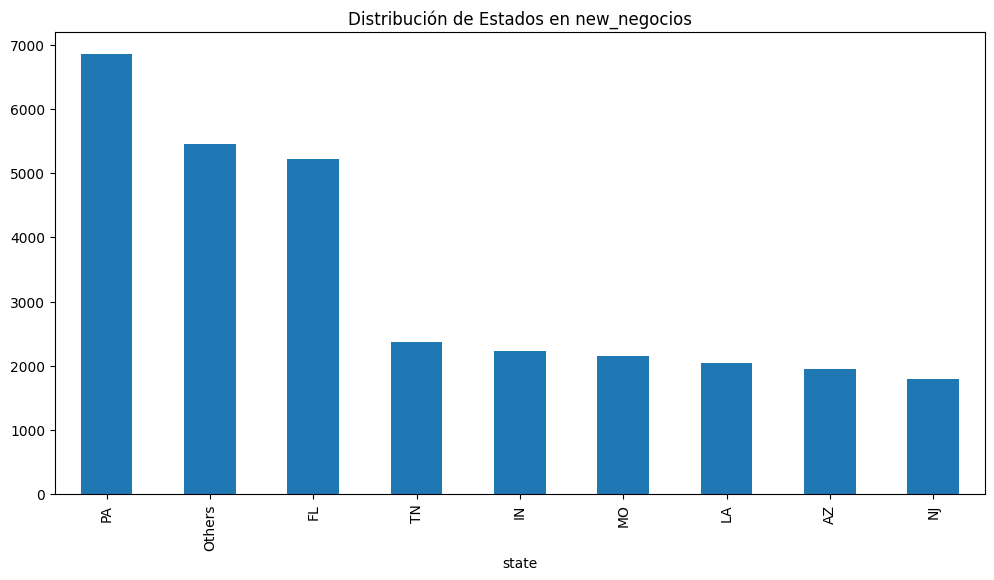

In [99]:
umbral = state_counts.mean()

# Paso 3: crear una nueva columna donde los estados raros se etiquetan como 'Others'
new_negocios['state'] = new_negocios['state'].apply(lambda x: x if state_counts[x] >= umbral else 'Others')
new_negocios['state'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Estados en new_negocios')

In [100]:
# from sklearn.preprocessing import OneHotEncoder

# # Crear el codificador
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # Aplicar sobre la columna 'state'
# state_onehot = encoder.fit_transform(new_negocios[['state']])

# # Obtener los nombres de columnas codificadas
# state_columns = encoder.get_feature_names_out(['state'])

# # Crear DataFrame con los vectores
# state_vector_df = pd.DataFrame(state_onehot, columns=state_columns, index=new_negocios.index)

# # (opcional) Unirlo al dataset original
# new_negocios = pd.concat([new_negocios, state_vector_df], axis=1)

In [101]:
# new_negocios = new_negocios.drop(columns=["state"])

In [102]:
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
11585,93qrwpRE4W3n7zwQTFUSqQ,Antioch,TN,1.5,31,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Food, Pizza, Sandwiches, Restaurants, Chicken ..."
21111,US2-dEVvnOdde7Syi18TTw,Metairie,LA,3.5,90,0,"{'RestaurantsAttire': ""'casual'"", 'Alcohol': ""...","Sandwiches, American (New), American (Traditio..."
1080,_FGfS-ifJKlpuIpfX_lfNQ,Tampa,FL,3.0,15,1,"{'Caters': 'False', 'RestaurantsTakeOut': 'Non...","Wholesale Stores, Grocery, Food, Shopping"
14799,awrYm6R5hobRQWzwypzbYg,Brentwood,TN,3.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Movers, Local Services, Propane, Truck Rental,..."
1095,VXR10qr90p0hTK0cmGWZhA,Kirkwood,MO,4.0,46,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsTa...","Cupcakes, Bakeries, Food"


## Procesamiento `review_count`

In [103]:
scaler = StandardScaler()

new_negocios['review_count'] = scaler.fit_transform(new_negocios[['review_count']])
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
21918,WPleSelT-dnFxDnnOeOi6A,Boise,Others,3.0,-0.153449,1,"{'GoodForKids': 'True', 'Music': ""{'dj': False...","Arcades, Pizza, Restaurants, Bowling, Arts & E..."
17099,0uR3qUHRrbjog6sMlArc9g,Swedesboro,NJ,4.0,-0.311869,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Tree Services, Home Services, Firewood"
24637,Tl14YHQu7uTTo25OD_uGRw,Metairie,LA,4.0,0.345571,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Bakeries, Restaurants, Caterers, Food, Event P..."
26828,9qwewhYfhBLuAnFCx2i6Lw,Reno,Others,2.0,-0.169291,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Appliances, Home & Garden, Shopping, Home Serv..."
26397,Uo1PnUEeLNQJ3dWVCUZ5CA,Boise,Others,4.0,0.654488,1,"{'Alcohol': ""u'beer_and_wine'"", 'RestaurantsPr...","Brewpubs, Restaurants, Sandwiches, American (T..."


## Procesamiento `categories`

In [104]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

Voy a dejarlo igual y hago encoder luego

In [105]:
def clasificar_categoria(categorias_str):
    categorias_str = str(categorias_str).lower()  # Por si hay NaNs o capitalización distinta

    if any(x in categorias_str for x in ['restaurant', 'pizza', 'mexican', 'chinese', 'japanese', 'sushi', 'ramen']):
        return 'Restaurant'
    elif any(x in categorias_str for x in ['fast food', 'burgers', 'hot dogs']):
        return 'Fast Food'
    elif any(x in categorias_str for x in ['nail', 'beauty', 'spa', 'hair', 'salon', 'fashion']):
        return 'Beauty'
    elif any(x in categorias_str for x in ['shopping', 'wear', 'clothing']):
        return 'Shopping'
    elif any(x in categorias_str for x in ['hotel', 'travel', 'campgrounds']):
        return 'Hospitality'
    elif any(x in categorias_str for x in ['cleaning', 'services', 'laundry']):
        return 'Services'
    else:
        return 'Others'
    
new_negocios['categories'] = new_negocios['categories'].apply(clasificar_categoria)
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
26593,yEEpb6E5T2oQB_7lEJK7aA,Edmonton,Others,3.0,-0.098003,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsAttir...",Restaurant
20557,vyBKcKAKsouZndnP12Hn_g,Des Peres,MO,4.5,-0.303948,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...",Others
18964,hdE-WhAmn-zWbl72YhQguw,Maple Shade,NJ,2.5,-0.280185,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",Shopping
21864,klncZKgM0Y_4hCU2dYF6aw,Santa Barbara,Others,3.5,-0.208896,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...",Shopping
4547,Oh_T694xSly6_5wNnqAliw,Indianapolis,IN,2.5,-0.280185,1,"{'BikeParking': 'False', 'RestaurantsDelivery'...",Others


## Procesamiento `attributes`

In [106]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

Complicado de primeras (la dejo y encoder)

In [107]:
new_negocios = new_negocios.drop(columns=["attributes"])
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,categories
1552,sTHhgEPdBdIw0WeGycZ0sA,Reno,Others,2.5,-0.296027,0,Services
7021,sIP_UK7isKqsj9Wq8XdXxQ,Kenner,LA,4.5,-0.169291,1,Restaurant
3071,W8fyKHzZX68SQWFvwq_JMQ,Reno,Others,4.0,3.284247,1,Others
17198,ZzN0X75GAtJTd-WOdPGNtw,Wilmington,Others,4.0,-0.280185,1,Restaurant
1829,4KE2HDFLNffXQ7_DdVFhlg,New Castle,Others,4.0,-0.311869,1,Hospitality


## Procesamiento `city`

In [108]:
new_negocios['city'].value_counts()

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Complicado de primeras

In [109]:
new_negocios = new_negocios.drop(columns=["city"])
new_negocios.sample(5)

,business_id,state,stars,review_count,is_open,categories
25859,rwDq9kqpKvs01wLbOTHzKw,IN,4.0,1.406980,1,Restaurant
25267,9TJzfMc4gEKSUxfnGcj6dw,Others,4.5,-0.090082,1,Restaurant
23559,OxhFfRWlpMib0VIiFsUicQ,TN,3.5,-0.129687,1,Hospitality
3923,qh-Ho_4Bf0IoAfRgKjpPIA,PA,2.5,1.319849,0,Restaurant
17358,gwVJHAP9k-RKld352FD6Cg,Others,2.5,-0.240580,1,Restaurant


## Últimos pasos

Dropeo las state porque estudiando la importancia que le da a los modelos no aporta mucho :( 

In [110]:
# new_negocios = new_negocios.drop(columns=[col for col in new_negocios.columns if col.startswith("state_")])
# new_negocios.sample(5)

Rellenos nulls.

In [111]:
# new_negocios['attributes'] = new_negocios['attributes'].fillna(" ")
# new_negocios['categories'] = new_negocios['categories'].fillna(" ")

In [112]:
new_negocios.isnull().sum()

business_id     0
state           0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

In [113]:
train_reviews.shape, new_usuarios.shape, new_negocios.shape

((967784, 9), (699619, 4), (30069, 6))

# Mergear datos

## Train

In [114]:
# Renombrar columnas de new_negocios, excepto 'business_id'
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)

# # Renombrar columnas de new_usuarios, excepto 'user_id'
new_usuarios_renamed = new_usuarios.rename(
    columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
)

# Unir las reseñas con la información de negocios
df_merged = train_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_merged = df_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_merged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,FL,4.5,0.773303,1,Restaurant,-0.230941,4.08,-0.033875
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,FL,2.5,-0.177212,1,Others,-0.050509,2.89,-0.035085
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,MO,2.5,-0.296027,1,Shopping,-0.271949,3.75,-0.033875
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,FL,4.5,0.226757,0,Restaurant,0.146327,3.79,-0.032664
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,FL,4.0,-0.105924,1,Restaurant,1.138707,4.20,0.004861


In [115]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  int64  
 5   funny               967784 non-null  int64  
 6   cool                967784 non-null  int64  
 7   text                967784 non-null  object 
 8   date                967784 non-null  object 
 9   state_neg           967784 non-null  object 
 10  stars_neg           967784 non-null  float64
 11  review_count_neg    967784 non-null  float64
 12  is_open_neg         967784 non-null  int64  
 13  categories_neg      967784 non-null  object 
 14  review_count_user   967783 non-null  float64
 15  average_stars_user  967783 non-nul

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [116]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'state_neg', 'stars_neg', 'review_count_neg',
       'is_open_neg', 'categories_neg', 'review_count_user',
       'average_stars_user', 'compliment_user'],
      dtype='object')

In [117]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.year
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
403098,kMGcbaXEa39luYHNCfrcaQ,uaTQsyvAIksx6Ebggpnlzw,pJcmPkgUyOHHhAvA9o6e8Q,5.0,0,0,0,This is my favorite nail place I've ever been ...,2021,Others,4.0,0.139626,1,Beauty,-0.296553,5.00,-0.033875
159348,SFUx6bIKwtoOv9xM1yYZOw,mGUYWSFpmVvDQTLDvkzk4w,hE_0ZJqs-x2IeaGyL5BEkA,5.0,0,0,0,"OMG, LOVE this store!!!\nI can spend over an h...",2013,FL,4.0,0.115863,1,Shopping,0.909065,3.53,-0.014507
427557,TW2Zg5oVib-U3K1GgNbgYQ,yTrw3uInQb2B2PQ_66HbBg,1U5ZqhfQZXPw0v_Fa29WBw,5.0,0,0,0,"Delicious food, lots to choose from, excellen...",2019,Others,3.5,0.290124,1,Restaurant,0.179133,4.01,-0.033875
828630,dujVh7trmamS7cVmdDKs7Q,skvl0p7f45QteghF2lbe4g,EI-x2auko13oNtjz0dbiXw,4.0,2,0,0,GOOD PONTS - Food is REALLY GOOD! Excellent c...,2017,MO,3.0,0.068337,1,Restaurant,-0.132524,4.04,-0.035085
26632,9G781GxESi4GHlgz0ZZzGg,YAfr_mXb2VH6nQT1osLqLA,GVWcwqUD-ekCMQ0x2Ke6Ww,5.0,1,0,0,Down right amazing! From the valet to the host...,2019,FL,4.5,5.834795,1,Restaurant,-0.034106,3.76,-0.033875


### Estandarización

In [118]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_merged[cols] = scaler.fit_transform(df_merged[cols])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
385882,KHo1QMJuoJbpax3CMnnUKA,ljI8hLcAsy0PM8E7sMCoyA,WJ7Su84c72jtPmUCS_hhcA,1.0,-0.391093,-0.150312,-0.251644,Egad this place was horrible. We had company ...,2014,FL,3.0,0.583200,1,Restaurant,-0.280150,2.33,-0.035085
313501,IEgfioz-qRnbpeMJStUyyg,jHJkr-d7y3HkeWrUxuueEA,qnTszlGgzUBu44tdQR7QgQ,5.0,-0.391093,-0.150312,-0.251644,We ordered the Pike Place Medium Roast Coffee ...,2013,FL,3.5,0.100021,1,Restaurant,-0.181732,4.73,-0.035085
37628,mkou38JqxDq3MPdkPWbkew,NTCrjLs9bHQTPww2ioecaA,L4G5ABxhYHQAKIcT0818_A,5.0,-0.062341,0.751859,0.255613,I've been coming to Bob's Diner in Roxborough ...,2017,PA,3.5,0.892117,1,Restaurant,0.023305,3.81,-0.030243
755849,2St9IBVgv_FKSr3v18_7hQ,DdHAvOHAN9RZSKJS4uzHJg,1Efjww8n7WtKtKTgDqjgdA,1.0,-0.391093,-0.150312,-0.251644,Restaurant week in Kop went to founding farmer...,2018,PA,3.5,8.678420,1,Restaurant,-0.288352,3.00,-0.035085
767821,dD40c0JkA4qgxR_7KAo88g,HAfbAsjFkI5kx4VNawxo7w,cN3ggTtgj50jwMilo7vGFA,2.0,-0.391093,-0.150312,-0.251644,Ridiculously slow service. Before we had even ...,2021,Others,3.5,1.644608,1,Restaurant,-0.296553,2.00,-0.035085


In [119]:
df_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [120]:
df_merged.shape

(967784, 17)

In [121]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  float64
 5   funny               967784 non-null  float64
 6   cool                967784 non-null  float64
 7   text                967784 non-null  object 
 8   date                967784 non-null  int32  
 9   state_neg           967784 non-null  object 
 10  stars_neg           967784 non-null  float64
 11  review_count_neg    967784 non-null  float64
 12  is_open_neg         967784 non-null  int64  
 13  categories_neg      967784 non-null  object 
 14  review_count_user   967783 non-null  float64
 15  average_stars_user  967783 non-nul

### Procesamos date

La borro

In [122]:
df_merged = df_merged.drop(columns=["date"])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
824654,Z_Z7kBVpuKRswcJ3oQ4ioQ,x5sjmDmZb1XeUhIHhJ578A,KdAWjL9MKjpJzEeI902qBA,2.0,-0.391093,-0.150312,-0.251644,I'm not sure why they're adding less and less ...,MO,4.0,4.511995,1,Restaurant,-0.288352,3.00,-0.035085
752651,1v_ORXO_rpRGi_HZYAY4Ag,rVN0VzcakDwxlxTbylQlIA,iz-zkIOSaCsbOPMXB4rVPA,4.0,-0.391093,-0.150312,-0.251644,The service here is great. Really friendly mo...,IN,3.5,-0.303948,1,Restaurant,0.843454,3.89,-0.026612
273840,N5wH6a4s7BNmiRLpT6oglw,5H3E6b_d79QX1xyfdOGltg,HHKK6IAvrQrZnw3wmYmjPA,4.0,0.595161,-0.150312,0.255613,"Overall, I would completely recommend! We star...",PA,3.5,0.527753,1,Restaurant,0.129924,3.59,-0.033875
641606,PDN8aCidFetbVX0DCuZOrw,scfMGv2d2UGOMaoayk3mVA,1MVoJvPhP5SkrJGCxuriaQ,1.0,-0.391093,-0.150312,-0.251644,My wife and I have ordered delivery from this ...,PA,1.0,-0.288106,1,Restaurant,-0.280150,2.33,-0.035085
110037,BtJ_NAS5sK9i_0YPK743WQ,ALLqr-xCFrA0RSaPKMVZkA,i_FWONQD1ZBqrNE2b-M5Ug,5.0,-0.391093,-0.150312,-0.251644,One of the city's best. Everything is beautifu...,PA,4.5,14.912214,1,Restaurant,-0.042307,3.89,-0.035085


### Procesamos nulls del join

In [123]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  float64
 5   funny               967784 non-null  float64
 6   cool                967784 non-null  float64
 7   text                967784 non-null  object 
 8   state_neg           967784 non-null  object 
 9   stars_neg           967784 non-null  float64
 10  review_count_neg    967784 non-null  float64
 11  is_open_neg         967784 non-null  int64  
 12  categories_neg      967784 non-null  object 
 13  review_count_user   967783 non-null  float64
 14  average_stars_user  967783 non-null  float64
 15  compliment_user     967783 non-nul

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [124]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_merged[column].fillna(df_merged[column].mean(), inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\4236792472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[column].fillna(df_merged[column].mean(), inplace=True)


In [125]:
df_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [126]:
df_merged.shape

(967784, 16)

In [127]:
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
415878,-e1Kh9FXc1TG_8HgWdzR0g,4Vtxl6Z77mLAetDOMUbY4w,dz3OXByhas7iZBAMSBlwYg,5.0,-0.391093,-0.150312,0.762869,Love this little gem. Great food and service. ...,FL,1.5,-0.129687,0,Restaurant,-0.009501,3.68,-0.033875
716591,Hpn9M-erF5EtTw8K8XYKnQ,0Bu7_bXX4dCssG0-OWd_jQ,U158K3VPSN8ZFlJ1rlR4FA,3.0,-0.391093,-0.150312,-0.251644,"Service was great, food was great, place is cl...",PA,4.0,2.769384,1,Restaurant,2.295117,3.17,-0.020559
742873,NexCObkMQpO-x0N_Jgv80A,AE5lqEoAEQYD5TreqfpkXQ,1ZW_rnoS2UBydTyc_0ikSQ,5.0,-0.391093,-0.150312,-0.251644,If I could give them 6 stars I would. The food...,FL,3.5,0.836670,0,Restaurant,-0.296553,5.00,-0.033875
242425,2N7tBRPhCGgqarGw6Xug1Q,q5mDv1OQRheL3nuN4Yut3A,nU6LmqtSI08VMKIibEQRMA,2.0,-0.062341,-0.150312,-0.251644,A pleasant family run restaurant. Food was ok...,Others,3.5,3.553559,1,Restaurant,0.900864,3.41,-0.031454
724397,IRBXsGm_JLu_tI6eDHJqDw,pi11rKWFwxaUmSPX5fYZ9g,QOPcqO5zvGVZL54917JUdw,5.0,-0.391093,-0.150312,0.255613,Great Middle East food. Great service. Baba Ga...,LA,4.5,1.098062,1,Restaurant,0.548200,3.96,0.026650


### Borramos ids, no aportan al modelo

In [128]:
df_merged = df_merged.drop(columns=["user_id", "business_id", "review_id"])

## Test

In [129]:
# Unir las reseñas con la información de negocios
df_test_merged = test_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_test_merged = df_test_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_test_merged.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
0,ieYPmCImINjPzTDFmEKBKA,79F9QrQSet-b1yRCIM243Q,sXSUzImYOcRRI3xtG2M85g,1,0,1,Amazing coffee and chill atmosphere. The staff...,2018-01-29 04:33:28,LA,4.5,1.375296,1,Restaurant,-0.001300,4.11,-0.032664
1,QIkJ8fZ4yx_QaHahWWszAA,chuM6TBkFHtTwJ6z96Hj1A,Ipt9ga67vVC_2ob3YmVwNA,4,0,2,I pass by this joint every time I make a run t...,2011-01-10 03:10:49,IN,4.0,0.583200,1,Restaurant,0.679424,3.77,0.152543
2,seR2KhblYMWg-k9zzN6aYA,hF68a0mpu97u0oaryFYhyg,_RG4IByyBR528CMc7DefJA,2,0,0,Came here when my kitten got very sick by the ...,2015-09-06 15:29:02,PA,3.5,0.765382,1,Others,-0.107919,2.92,-0.031454
3,BToo00Fi5pfJFA5MI2HM5g,G4yX5Q1tFfwSucFOmiyjdA,xxlbRiWWQkk-6LST3Hd12g,2,0,0,So I'll preface by saying we did have an overa...,2015-09-14 00:49:17,LA,4.0,1.256481,1,Restaurant,0.269349,3.82,0.026650
4,FHJAzi1imodBit3RWK7zQA,Srqi1xb7exdB9uRHxDeEkw,LgGqdFLD7-ca0Z9F_q4Fuw,0,0,0,This place is a joke. Worst bar service ever. ...,2015-07-24 01:03:40,FL,2.5,3.561480,1,Hospitality,-0.271949,1.25,-0.033875


### Estandarización

In [130]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_test_merged[cols] = scaler.fit_transform(df_test_merged[cols])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
112184,jOlzCn-SlK6__WOpVPfKRg,1Rp98sWlpjRFBjeHbCFxjg,OdZvcANdOkcm6l61m7hENg,0.263766,-0.164229,0.253789,I ordered a bus for my birthday this July. My ...,2019-07-15 17:37:32,MO,3.0,-0.185133,1,Hospitality,-0.271949,4.00,-0.035085
320647,8AeRcH4O6-8LWqYx7CdooQ,o15CIbVTrHXsvBxOURXAvw,nhEyyLGxsJfe5auEKqofTw,-0.390020,-0.164229,-0.252063,This is my first time visiting the district ta...,2021-11-29 00:52:20,IN,4.0,0.781224,1,Restaurant,-0.296553,5.00,-0.035085
136618,5mI1o-nkHZ7QocCpBR71kg,i_pC2hloRZruIPGhOWYrxg,4rsJT6LV4hBtSrQiDO9ayw,-0.063127,-0.164229,-0.252063,I have been going to Salon Bella Flora for ove...,2012-07-18 02:57:44,FL,4.5,-0.129687,1,Beauty,-0.124322,4.59,-0.033875
42555,Xo1ufv2vKEOfiBTRQiaYAA,ya8XYjqKZRrDEZx12diCbw,DVBJRvnCpkqaYl6nHroaMg,-0.390020,-0.164229,-0.252063,"TBH, I came here with low expectations. Order...",2021-06-05 17:53:05,AZ,5.0,5.232803,1,Restaurant,0.039708,3.71,-0.035085
395497,52eELpqZikmYndAhptsDNQ,TfeDrNQDWHL3aYm_OCmdWQ,vZ1CQyKpPBK5_jn9aujtCg,-0.390020,-0.164229,-0.252063,"Terrible service, and even worse...the food. T...",2018-05-23 15:42:11,FL,3.5,0.630726,1,Restaurant,0.129924,3.95,-0.030243


### Procesamos date

In [131]:
df_test_merged = df_test_merged.drop(columns=["date"])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
59147,iUTaBWRKHm3MWHRClF9mPg,ytYLFX0-ZoRMCTynlxIfIw,5TwBLv_xV0LawqkbIllEVg,-0.39002,-0.164229,-0.252063,This shop is very small. It is not the best in...,FL,4.5,2.048577,1,Restaurant,0.433379,4.21,-0.029033
340315,QB3xxosgGAXdam0YKoAk2w,7qLXjZJKxBeZhrNFEdETLQ,t2ASUt5TzlPUiomdNsQLuA,-0.39002,-0.164229,-0.252063,I love a night out at the STRAZ. Always a gre...,FL,4.0,1.145588,1,Services,0.679424,3.22,0.003651
218456,CoIKOlok_GbwpmWvN7oskw,mASxmaixvYyV948AFa0Wjw,llLvHJgkKQNfzgtKf6p3BQ,-0.39002,-0.164229,-0.252063,This place is just fun. It is an old fire sta...,FL,4.0,4.321892,1,Restaurant,0.375969,3.92,-0.009665
278937,Cbcoa1d4PxnprZ9plfLqTQ,ryubBqMSg45VujqRFmC-Bw,l1LgSU6bOX_mjCKgQr7gkw,-0.39002,-0.164229,-0.252063,I love their fried plantains! I'm vegetarian s...,TN,3.5,-0.066319,0,Restaurant,-0.083315,4.26,-0.033875
13502,uOo-GJAhI-8Go_CNExBHzA,fVLqrQYRMLtBVuEzbPGnHQ,tXf6TpqHOLiwyMNbYAOOCQ,-0.39002,-0.164229,-0.252063,My first time here and it was perfect!! Best ...,FL,4.5,2.080261,1,Restaurant,-0.280150,5.00,-0.035085


### Procesamos nulls del join

In [132]:
df_test_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [133]:
df_test_merged.info()
df_test_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           414765 non-null  object 
 1   user_id             414765 non-null  object 
 2   business_id         414765 non-null  object 
 3   useful              414765 non-null  float64
 4   funny               414765 non-null  float64
 5   cool                414765 non-null  float64
 6   text                414765 non-null  object 
 7   state_neg           414765 non-null  object 
 8   stars_neg           414765 non-null  float64
 9   review_count_neg    414765 non-null  float64
 10  is_open_neg         414765 non-null  int64  
 11  categories_neg      414765 non-null  object 
 12  review_count_user   414764 non-null  float64
 13  average_stars_user  414764 non-null  float64
 14  compliment_user     414764 non-null  float64
dtypes: float64(8), int64(1), object(6)

review_id             0
user_id               0
business_id           0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [134]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_test_merged[column].fillna(df_test_merged[column].mean(), inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\3648126179.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_merged[column].fillna(df_test_merged[column].mean(), inplace=True)


In [135]:
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
321669,Y9n8CoVZSLad8yZk375EBg,BYaY5fEW9FCzHFf8pWwsZA,4dumsuFlbxmovgNMZ6XVtg,-0.390020,-0.164229,-0.252063,Yogurt was amazing! Was a little apprehensive ...,LA,4.0,0.274282,1,Others,-0.271949,4.00,-0.035085
325358,ARICbEcapdttn9Q7jvbG0w,B0l1kMglugXKKQ0q5rEQDw,DZ1tBEWnubwsIbgbNydxeA,-0.390020,-0.164229,-0.252063,It's disappointing when small businesses/resta...,IN,4.5,2.729780,1,Restaurant,-0.296553,1.00,-0.035085
302991,BjINacBwSlcN23MpiG90Iw,K4Q6DbNlHCm6Yrqv9SJ-uQ,wSk4Gbjq5-d2uHcyO31mSg,-0.063127,0.323761,-0.252063,"I would have to agree with the "" cheesy"" FLIGH...",FL,3.5,0.044575,0,Restaurant,-0.271949,3.75,-0.032664
73623,2HvjWWoOSkvrRq5zVYKl6Q,ElZ2ELzuaSiVOX6d3XgKeQ,hP0K-I4BhFh9z0y4va3FdQ,1.244444,0.323761,0.759641,Well it's a store but it only has two walls as...,FL,4.5,-0.105924,1,Shopping,5.255854,4.18,0.660955
30433,K6WEap6hC8gMopZowzOaow,gb8UDnHlu3XjcjwZryVNPA,zRLIbiUqmTDLxJUqugBO2w,-0.063127,-0.164229,-0.252063,The food here is extremely lacking and the cus...,PA,3.0,0.210915,1,Restaurant,0.950073,4.51,-0.019349


### Ultimos pasos

In [136]:
df_test_merged = df_test_merged.drop(columns=["user_id", "business_id"])
df_test_merged.sample(5)

,review_id,useful,funny,cool,text,state_neg,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
110330,nFQ0XyNmNAf9MaxOt9lM2w,-0.063127,-0.164229,-0.252063,I have been to this establishment frequently s...,AZ,3.0,-0.026714,1,Beauty,-0.091516,4.91,-0.026612
60359,3r_BnuPc9WadsomBHiyrsw,-0.390020,-0.164229,-0.252063,"Super helpful (my associate, Justin, in partic...",PA,5.0,-0.256422,1,Shopping,-0.271949,3.43,-0.032664
380969,p07HDAQgeBJ-XulfSTxMkQ,-0.390020,0.323761,-0.252063,Food was extremely good but the White ladys at...,MO,2.0,-0.098003,1,Restaurant,-0.247344,3.00,-0.035085
367776,5z334B-mPx3d00LQYMYteA,0.590659,-0.164229,1.265494,Smokin' indeed. I've never imagined BBQ in a ...,PA,3.5,5.953610,0,Restaurant,2.131087,4.06,0.553220
29301,5AIHFRxmAm9w8yZ_TAUhBw,-0.390020,-0.164229,-0.252063,Incredible Integrity at Sevenish Law! Randy Se...,IN,3.5,-0.311869,1,Services,-0.271949,5.00,-0.035085


In [137]:
df_test_merged.shape, df_merged.shape

((414765, 13), (967784, 13))

In [138]:
df_merged.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'state_neg', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'categories_neg',
       'review_count_user', 'average_stars_user', 'compliment_user'],
      dtype='object')

In [139]:
df_test_merged.columns

Index(['review_id', 'useful', 'funny', 'cool', 'text', 'state_neg',
       'stars_neg', 'review_count_neg', 'is_open_neg', 'categories_neg',
       'review_count_user', 'average_stars_user', 'compliment_user'],
      dtype='object')

In [140]:
df_merged.isnull().sum()

stars                 0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [141]:
df_test_merged.isnull().sum()

review_id             0
useful                0
funny                 0
cool                  0
text                  0
state_neg             0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [142]:
df_test_merged.to_csv("../data/test_reviews_merged_all_more.csv", index=False)
df_merged.to_csv("../data/train_reviews_merged_all_more.csv", index=False)